<h1><center>CSEN1022:Assignment 2</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Salma ElSayed

GUC-ID: 43-6801

Elective Tutorial No.: No.: T4

**Member 2**

Name: Ali Elbadry

GUC-ID: 43-6833

Elective Tutorial No.: T2

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Create Classes

In [2]:
#Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self, feature_size):
        self.feature_size=feature_size
        self.mean=np.zeros(feature_size)
        self.var=np.zeros(feature_size)

    def fit(self, x, t):
        print("fitting... ")
        x_c1, x_c2 = self.split_classes(x,t)
        x_transposed = np.transpose(x_c1)
        for i in range(len(x_transposed)):
          self.mean[i] = np.mean(x_transposed[i])
          self.var[i] = np.var(x_transposed[i])
        print("Mean")
        print(self.mean)
        print("Variance")
        print(self.var)
        return

    def split_classes(self, x, t):
        mask1=(t==1)
        mask2=(t==-1)
        c1=x[mask1]
        c2=x[mask2]
        return c1, c2

    def predict(self, datapoint):
        probability=1;
        for i in range(len(datapoint)):
          gaussian_distribution = (1/ np.sqrt(2*np.pi*self.var[i])) * np.exp(-(datapoint[i] - self.mean[i])**2/(2 * self.var[i]))
          probability = probability * gaussian_distribution
        return probability

In [ ]:
#Gaussian Generative Model Classifier

## Create Helper Function

In [3]:
#Prediction done using the method given at the bottom of slide 18 in Lecture 3.pdf
def predict(y_airplane, y_automobile, y_frog):
        if(y_airplane>=y_automobile and y_airplane>=y_frog):
            return np.array([1,0,0])
        if(y_automobile>y_airplane and y_automobile>=y_frog):
            return np.array([0,1,0])
        else:
            return np.array([0,0,1])

## Read Data

In [4]:
from google.colab import files
uploaded = files.upload()
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/frog/0.jpg   
  inflating: Data/train/frog/1.jpg   
  inflating: Data/train/frog/10.jpg  
  inflating: Data/train/frog/100.jpg  
  inflating: Data/train/frog/1000.jpg  
  inflating: Data/train/frog/1001.jpg  
  inflating: Data/train/frog/1002.jpg  
  inflating: Data/train/frog/1003.jpg  
  inflating: Data/train/frog/1004.jpg  
  inflating: Data/train/frog/1005.jpg  
  inflating: Data/train/frog/1006.jpg  
  inflating: Data/train/frog/1007.jpg  
  inflating: Data/train/frog/1008.jpg  
  inflating: Data/train/frog/1009.jpg  
  inflating: Data/train/frog/101.jpg  
  inflating: Data/train/frog/1010.jpg  
  inflating: Data/train/frog/1011.jpg  
  inflating: Data/train/frog/1012.jpg  
  inflating: Data/train/frog/1013.jpg  
  inflating: Data/train/frog/1014.jpg  
  inflating: Data/train/frog/1015.jpg  
  inflating: Data/train/frog/1016.jpg  
  inflating: Data/train/frog/1017.jpg  
  inflating: Data/train/frog/1018.jpg

In [5]:
def read_train_rgb(name, size):
    #train_path = '/content/Data/train/'
    train_path = 'Data/train/'
    data = np.array([plt.imread(train_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,5000)])
    if(size!=32):
      data = np.array([cv2.resize(data[i], (size,size), interpolation=cv2.INTER_AREA) for i in np.arange(0,5000)])
    data=data.reshape(-1,size*size*3)
    data=data/255
    return data
def read_test_rgb(name, size):
    #train_path = '/content/Data/train/'
    test_path = 'Data/test/'
    data = np.array([plt.imread(test_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,1000)])
    if(size!=32):
      data = np.array([cv2.resize(data[i], (size,size), interpolation=cv2.INTER_AREA) for i in np.arange(0,1000)])
    data=data.reshape(-1,size*size*3)
    data=data/255
    return data
def create_labels(order):
    pos= np.ones(5000)
    neg =np.ones(5000)*-1
    if (order==0):
        labels = np.concatenate((pos,neg,neg))
    if order==1:
        labels = np.concatenate((neg,pos,neg))
    if order==2:
        labels = np.concatenate((neg,neg,pos))
    return labels

In [6]:
airplane_train32 = read_train_rgb('airplane',32)
automobile_train32 = read_train_rgb('automobile', 32)
frog_train32 = read_train_rgb('frog', 32)

In [7]:
airplane_test32= read_test_rgb('airplane', 32)
automobile_test32= read_test_rgb('automobile', 32)
frog_test32= read_test_rgb('frog', 32)

In [8]:
# return (x_train, y_train), (x_test, y_test)
x_train32 = np.concatenate((airplane_train32,automobile_train32,frog_train32))
x_test32=np.concatenate((airplane_test32,automobile_test32,frog_test32))

In [9]:
airplane_train16 = read_train_rgb('airplane', 16)
automobile_train16 = read_train_rgb('automobile', 16)
frog_train16 = read_train_rgb('frog', 16)

In [10]:
airplane_test16= read_test_rgb('airplane', 16)
automobile_test16= read_test_rgb('automobile', 16)
frog_test16= read_test_rgb('frog', 16)

In [11]:
# return (x_train, y_train), (x_test, y_test)
x_train16 = np.concatenate((airplane_train16,automobile_train16,frog_train16))
x_test16=np.concatenate((airplane_test16,automobile_test16,frog_test16))

In [12]:
airplane_train8 = read_train_rgb('airplane', 8)
automobile_train8 = read_train_rgb('automobile', 8)
frog_train8 = read_train_rgb('frog', 8)

In [13]:
airplane_test8= read_test_rgb('airplane', 8)
automobile_test8= read_test_rgb('automobile', 8)
frog_test8= read_test_rgb('frog', 8)

In [14]:
# return (x_train, y_train), (x_test, y_test)
x_train8 = np.concatenate((airplane_train8,automobile_train8,frog_train8))
x_test8=np.concatenate((airplane_test8,automobile_test8,frog_test8))

In [15]:
airplane_train4 = read_train_rgb('airplane',4)
automobile_train4 = read_train_rgb('automobile',4)
frog_train4 = read_train_rgb('frog', 4)

In [16]:
airplane_test4= read_test_rgb('airplane', 4)
automobile_test4= read_test_rgb('automobile', 4)
frog_test4= read_test_rgb('frog', 4)

In [17]:
# return (x_train, y_train), (x_test, y_test)
x_train4 = np.concatenate((airplane_train4,automobile_train4,frog_train4))
x_test4=np.concatenate((airplane_test4,automobile_test4,frog_test4))

In [18]:
airplane_t=create_labels(0)
automobile_t=create_labels(1)
frog_t=create_labels(2)

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [19]:
#construct a Naive Bayes classifier for the airplane class
airplane_model= NaiveBayesClassifier(3072)

#train the classifier
airplane_model.fit(x_train32,airplane_t)

airplane_probability = np.zeros(3000)

for i in range(len(x_test32)):
  airplane_probability[i]= airplane_model.predict(x_test32[i])

fitting... 
Mean
[0.56773333 0.63197647 0.6978298  ... 0.50846745 0.53315451 0.53987922]
Variance
[0.07272869 0.05825648 0.06049885 ... 0.06964337 0.06411666 0.07944941]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars


In [20]:
#construct a Naive Bayes classifier for the automobile class
automobile_model= NaiveBayesClassifier(3072)

#train the classifier
automobile_model.fit(x_train32,automobile_t)

automobile_probability = np.zeros(3000)

for i in range(len(x_test32)):
  automobile_probability[i]= automobile_model.predict(x_test32[i])

fitting... 
Mean
[0.53522745 0.54109098 0.53099373 ... 0.52409098 0.51506039 0.49479216]
Variance
[0.09782884 0.09870726 0.11271639 ... 0.06948703 0.06622083 0.07075035]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars


In [21]:
#construct a Naive Bayes classifier for the frog class
frog_model= NaiveBayesClassifier(3072)

#train the classifier
frog_model.fit(x_train32,frog_t)

frog_probability = np.zeros(3000)

for i in range(len(x_test32)):
  frog_probability[i]= frog_model.predict(x_test32[i])

fitting... 
Mean
[0.45160784 0.44540706 0.36726275 ... 0.49941804 0.4800149  0.39808706]
Variance
[0.07324788 0.06922343 0.07310898 ... 0.06590842 0.06092018 0.06918161]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in double_scalars


In [22]:
#concatenate the 3 probability vectors
probabilities = np.array([airplane_probability, automobile_probability, frog_probability])
probabilities = np.transpose(probabilities)
#constuct confusion matrix
confusion_matrix = np.zeros(9).reshape(3,3)
for i in range(0,1000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[0][0] = confusion_matrix[0][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[0][1] = confusion_matrix[0][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[0][2] = confusion_matrix[0][2] + 1 #point classified into class 2 

for i in range(1000,2000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[1][0] = confusion_matrix[1][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[1][1] = confusion_matrix[1][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[1][2] = confusion_matrix[1][2] + 1 #point classified into class 2 

for i in range(2000,3000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[2][0] = confusion_matrix[2][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[2][1] = confusion_matrix[2][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[2][2] = confusion_matrix[2][2] + 1 #point classified into class 2

In [24]:
confusion_matrices_nb += [confusion_matrix]

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [26]:
confusion_matrix= np.zeros(9).reshape(3,3)
confusion_matrices_gm += [confusion_matrix]
confusion_matrices_gm += [confusion_matrix]
confusion_matrices_gm += [confusion_matrix]
confusion_matrices_gm += [confusion_matrix]

In [27]:
confusion_matrices_gm

[array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]), array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])]

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [28]:
#naive bayes classifier image size 16

#construct a Naive Bayes classifier for the airplane class
airplane_model= NaiveBayesClassifier(768)

#train the classifier
airplane_model.fit(x_train16,airplane_t)

airplane_probability = np.zeros(3000)

for i in range(len(x_test16)):
  airplane_probability[i]= airplane_model.predict(x_test16[i])

#construct a Naive Bayes classifier for the automobile class
automobile_model= NaiveBayesClassifier(768)

#train the classifier
automobile_model.fit(x_train16,automobile_t)

automobile_probability = np.zeros(3000)

for i in range(len(x_test16)):
  automobile_probability[i]= automobile_model.predict(x_test16[i])

#construct a Naive Bayes classifier for the frog class
frog_model= NaiveBayesClassifier(768)

#train the classifier
frog_model.fit(x_train16,frog_t)

frog_probability = np.zeros(3000)

for i in range(len(x_test16)):
  frog_probability[i]= frog_model.predict(x_test16[i])

#concatenate the 3 probability vectors
probabilities = np.array([airplane_probability, automobile_probability, frog_probability])
probabilities = np.transpose(probabilities)
#constuct confusion matrix
confusion_matrix = np.zeros(9).reshape(3,3)
for i in range(0,1000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[0][0] = confusion_matrix[0][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[0][1] = confusion_matrix[0][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[0][2] = confusion_matrix[0][2] + 1 #point classified into class 2 

for i in range(1000,2000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[1][0] = confusion_matrix[1][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[1][1] = confusion_matrix[1][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[1][2] = confusion_matrix[1][2] + 1 #point classified into class 2 

for i in range(2000,3000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[2][0] = confusion_matrix[2][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[2][1] = confusion_matrix[2][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[2][2] = confusion_matrix[2][2] + 1 #point classified into class 2

confusion_matrices_nb += [confusion_matrix]

fitting... 
Mean
[0.56665647 0.63066824 0.69624    0.56764941 0.63150902 0.6966549
 0.5735349  0.63725569 0.70232078 0.57717255 0.64086824 0.70626431
 0.57946902 0.64351216 0.70864706 0.58208549 0.6464102  0.71047843
 0.58407216 0.64795843 0.71177098 0.58324    0.64634353 0.71007843
 0.58307294 0.64598118 0.70987686 0.5834502  0.64707216 0.71149569
 0.58191137 0.64615216 0.71081098 0.58124235 0.64550118 0.70997804
 0.57838588 0.64264784 0.70683059 0.5740549  0.63819294 0.70228706
 0.56828784 0.63212235 0.69694667 0.56587216 0.62904235 0.69466824
 0.56554902 0.62776941 0.69095216 0.56520941 0.62652235 0.68873569
 0.56906118 0.63042745 0.69191686 0.57279608 0.63462667 0.69630588
 0.57613961 0.63858824 0.70055059 0.57780549 0.6405098  0.70205176
 0.57900863 0.64143529 0.70260314 0.57847922 0.64081725 0.70173176
 0.57958824 0.64138196 0.70275451 0.5799302  0.64213882 0.70372706
 0.5788149  0.6410698  0.70291137 0.57832863 0.6406251  0.70168706
 0.57457569 0.63660314 0.69755686 0.57117412 0

In [29]:
#naive bayes classifier image size 8

#construct a Naive Bayes classifier for the airplane class
airplane_model= NaiveBayesClassifier(192)

#train the classifier
airplane_model.fit(x_train8,airplane_t)

airplane_probability = np.zeros(3000)

for i in range(len(x_test8)):
  airplane_probability[i]= airplane_model.predict(x_test8[i])

#construct a Naive Bayes classifier for the automobile class
automobile_model= NaiveBayesClassifier(192)

#train the classifier
automobile_model.fit(x_train8,automobile_t)

automobile_probability = np.zeros(3000)

for i in range(len(x_test8)):
  automobile_probability[i]= automobile_model.predict(x_test8[i])

#construct a Naive Bayes classifier for the frog class
frog_model= NaiveBayesClassifier(192)

#train the classifier
frog_model.fit(x_train8,frog_t)

frog_probability = np.zeros(3000)

for i in range(len(x_test8)):
  frog_probability[i]= frog_model.predict(x_test8[i])

#concatenate the 3 probability vectors
probabilities = np.array([airplane_probability, automobile_probability, frog_probability])
probabilities = np.transpose(probabilities)
#constuct confusion matrix
confusion_matrix = np.zeros(9).reshape(3,3)
for i in range(0,1000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[0][0] = confusion_matrix[0][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[0][1] = confusion_matrix[0][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[0][2] = confusion_matrix[0][2] + 1 #point classified into class 2 

for i in range(1000,2000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[1][0] = confusion_matrix[1][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[1][1] = confusion_matrix[1][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[1][2] = confusion_matrix[1][2] + 1 #point classified into class 2 

for i in range(2000,3000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[2][0] = confusion_matrix[2][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[2][1] = confusion_matrix[2][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[2][2] = confusion_matrix[2][2] + 1 #point classified into class 2

confusion_matrices_nb += [confusion_matrix]

fitting... 
Mean
[0.56570824 0.62860549 0.69260549 0.5725898  0.63523765 0.69866275
 0.57831373 0.64172392 0.70487922 0.58067294 0.64364314 0.70601176
 0.58094039 0.64362902 0.70644941 0.57955922 0.64283294 0.70581882
 0.57402431 0.63704627 0.69972549 0.56513961 0.62787216 0.69202588
 0.56213647 0.62008    0.67712078 0.56443608 0.6198251  0.67367373
 0.56754431 0.6232149  0.67763451 0.56727608 0.62361255 0.67814667
 0.56788706 0.6247749  0.67859059 0.56925569 0.62518667 0.67834039
 0.56816471 0.62370667 0.67793647 0.56163843 0.62022745 0.67796549
 0.55304863 0.60339294 0.6509051  0.54668941 0.5892298  0.63050196
 0.54333569 0.58395137 0.62330431 0.53792784 0.57834588 0.61826824
 0.53849804 0.58042039 0.62007294 0.5472949  0.58888784 0.62777961
 0.55431294 0.59639843 0.63883608 0.55240235 0.60255843 0.64964863
 0.54443451 0.58434431 0.61939137 0.52738902 0.55568941 0.58189647
 0.51183294 0.53428078 0.5555349  0.50024549 0.51977961 0.53878353
 0.50538118 0.52307765 0.54058275 0.52073647 

In [30]:
#naive bayes classifier image size 4

#construct a Naive Bayes classifier for the airplane class
airplane_model= NaiveBayesClassifier(48)

#train the classifier
airplane_model.fit(x_train4,airplane_t)

airplane_probability = np.zeros(3000)

for i in range(len(x_test4)):
  airplane_probability[i]= airplane_model.predict(x_test4[i])

#construct a Naive Bayes classifier for the automobile class
automobile_model= NaiveBayesClassifier(48)

#train the classifier
automobile_model.fit(x_train4,automobile_t)

automobile_probability = np.zeros(3000)

for i in range(len(x_test4)):
  automobile_probability[i]= automobile_model.predict(x_test4[i])

#construct a Naive Bayes classifier for the frog class
frog_model= NaiveBayesClassifier(48)

#train the classifier
frog_model.fit(x_train4,frog_t)

frog_probability = np.zeros(3000)

for i in range(len(x_test4)):
  frog_probability[i]= frog_model.predict(x_test4[i])

#concatenate the 3 probability vectors
probabilities = np.array([airplane_probability, automobile_probability, frog_probability])
probabilities = np.transpose(probabilities)
#constuct confusion matrix
confusion_matrix = np.zeros(9).reshape(3,3)
for i in range(0,1000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[0][0] = confusion_matrix[0][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[0][1] = confusion_matrix[0][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[0][2] = confusion_matrix[0][2] + 1 #point classified into class 2 

for i in range(1000,2000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[1][0] = confusion_matrix[1][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[1][1] = confusion_matrix[1][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[1][2] = confusion_matrix[1][2] + 1 #point classified into class 2 

for i in range(2000,3000):
    y_pred = predict(probabilities[i][0],probabilities[i][1], probabilities[i][2])#predicting label for datapoint
  #updating confusion matrix
    if(y_pred[0]==1):
        confusion_matrix[2][0] = confusion_matrix[2][0] + 1 #point classified into class 0
    elif(y_pred[1]==1):
        confusion_matrix[2][1] = confusion_matrix[2][1] + 1  #point classified into class 1
    elif(y_pred[2]==1):
        confusion_matrix[2][2] = confusion_matrix[2][2] + 1 #point classified into class 2

confusion_matrices_nb += [confusion_matrix]

fitting... 
Mean
[0.56622824 0.62596    0.68552863 0.57346431 0.63307294 0.69168941
 0.57439922 0.63408314 0.69230667 0.56720549 0.62722588 0.68692078
 0.54287529 0.58313804 0.62065412 0.5233451  0.55406588 0.58395137
 0.52797961 0.55848627 0.58752706 0.54486118 0.58387373 0.62139765
 0.51537647 0.54194824 0.56060471 0.46860784 0.48072157 0.4894
 0.46663294 0.47871608 0.48792706 0.51070588 0.53792314 0.55755843
 0.51162039 0.53693961 0.54502353 0.50456627 0.52649569 0.53234275
 0.50340235 0.52613098 0.53272    0.50847373 0.53423059 0.54315294]
Variance
[0.05696232 0.04536524 0.04983224 0.05501626 0.0429687  0.04689386
 0.0551768  0.04337683 0.04714945 0.05693951 0.04519274 0.04916942
 0.03848351 0.03325152 0.04132155 0.0306046  0.02774213 0.03442821
 0.03065216 0.02790248 0.03450699 0.03760901 0.03288749 0.04073737
 0.03640165 0.0334062  0.04420747 0.02702871 0.0257363  0.03305221
 0.02651379 0.02522445 0.03230942 0.03609637 0.03317279 0.04407594
 0.05070208 0.04749672 0.06280024 0.046

In [31]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


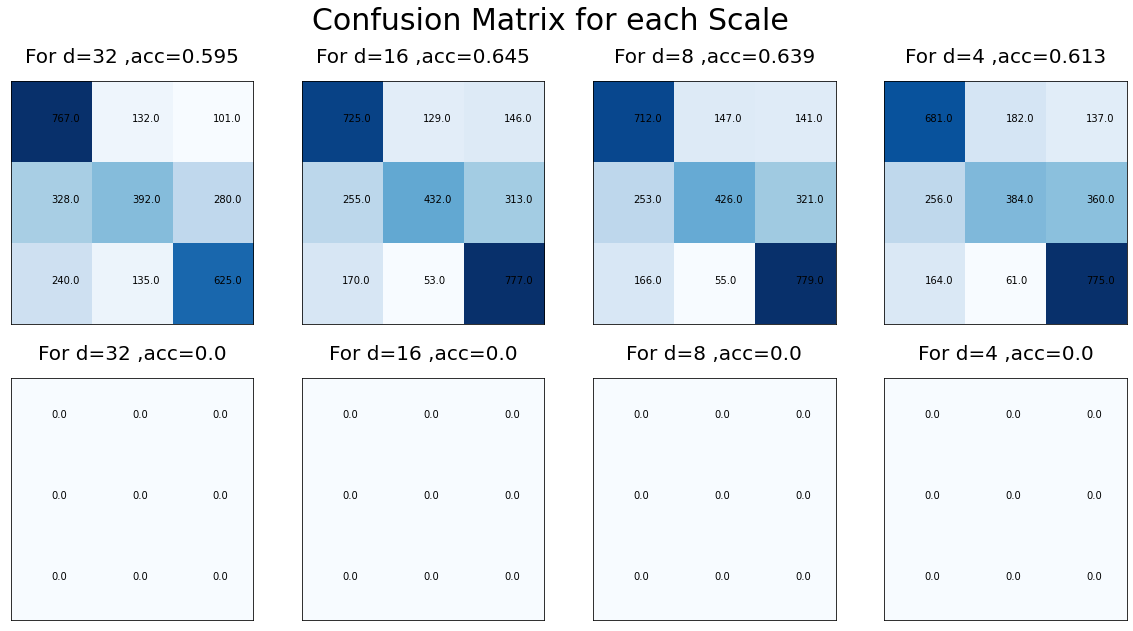

In [32]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

Text(0.5, 1.0, 'NB VS GM')

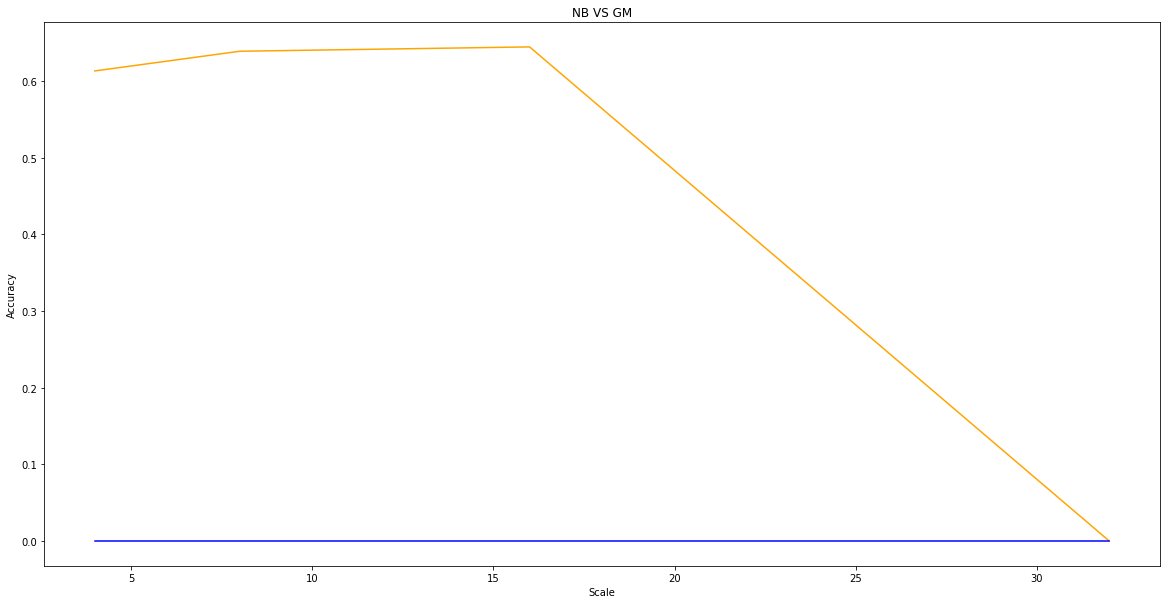

In [164]:
plt.figure(figsize=(20,10))
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
Edit Here
###